# 查看配置信息

In [4]:
import sys

In [5]:
print(sys.version)
print(sys.executable)

3.9.15 (main, Nov 24 2022, 08:28:41) 
[Clang 14.0.6 ]
/Users/lucas/anaconda3/envs/pytorch_gpu/bin/python


查看 cuda 等深度学习相关配置的版本

In [6]:
from torchvision import datasets
from torchvision import transforms
import torch

In [7]:
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.version()) 

1.13.1
None
None


In [8]:
if torch.backends.mps.is_available():
    device = torch.device('mps')
elif torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(f"Training on device {device}.")

Training on device mps.


# MNIST分类

## 数据导入和预处理

In [9]:
dir(datasets)

['CIFAR10',
 'CIFAR100',
 'CLEVRClassification',
 'CREStereo',
 'Caltech101',
 'Caltech256',
 'CarlaStereo',
 'CelebA',
 'Cityscapes',
 'CocoCaptions',
 'CocoDetection',
 'Country211',
 'DTD',
 'DatasetFolder',
 'EMNIST',
 'ETH3DStereo',
 'EuroSAT',
 'FER2013',
 'FGVCAircraft',
 'FakeData',
 'FallingThingsStereo',
 'FashionMNIST',
 'Flickr30k',
 'Flickr8k',
 'Flowers102',
 'FlyingChairs',
 'FlyingThings3D',
 'Food101',
 'GTSRB',
 'HD1K',
 'HMDB51',
 'INaturalist',
 'ImageFolder',
 'ImageNet',
 'InStereo2k',
 'KMNIST',
 'Kinetics',
 'Kitti',
 'Kitti2012Stereo',
 'Kitti2015Stereo',
 'KittiFlow',
 'LFWPairs',
 'LFWPeople',
 'LSUN',
 'LSUNClass',
 'MNIST',
 'Middlebury2014Stereo',
 'Omniglot',
 'OxfordIIITPet',
 'PCAM',
 'PhotoTour',
 'Places365',
 'QMNIST',
 'RenderedSST2',
 'SBDataset',
 'SBU',
 'SEMEION',
 'STL10',
 'SUN397',
 'SVHN',
 'SceneFlowStereo',
 'Sintel',
 'SintelStereo',
 'StanfordCars',
 'UCF101',
 'USPS',
 'VOCDetection',
 'VOCSegmentation',
 'VisionDataset',
 'WIDERFace',


In [10]:
data_path = './MNIST/'
# toTensor() 会归一化，但后面要自己计算mean和std进行标准化
mnist_train = datasets.MNIST(root=data_path, train=True, download=True, transform=transforms.ToTensor())
mnist_val = datasets.MNIST(root=data_path, train=False, download=True, transform=transforms.ToTensor())

In [11]:
mnist_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./MNIST/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [12]:
imgs = torch.stack([img_t for img_t, _ in mnist_train])
imgs.shape # (B, C, H, W)

torch.Size([60000, 1, 28, 28])

In [13]:
mean = imgs.view(-1, 1).mean(dim=0)
mean

tensor([0.1307])

In [14]:
std = imgs.view(-1, 1).std(dim=0)
std

tensor([0.3081])

In [15]:
# 最好让框架来处理
transformed_mnist_train = datasets.MNIST(root=data_path, train=True, download=True, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
]))

transformed_mnist_val = datasets.MNIST(root=data_path, train=False, download=True, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
]))

## 定义模型

In [16]:
import torch.nn as nn
import torch.optim as optim

In [17]:
dir(nn)

['AdaptiveAvgPool1d',
 'AdaptiveAvgPool2d',
 'AdaptiveAvgPool3d',
 'AdaptiveLogSoftmaxWithLoss',
 'AdaptiveMaxPool1d',
 'AdaptiveMaxPool2d',
 'AdaptiveMaxPool3d',
 'AlphaDropout',
 'AvgPool1d',
 'AvgPool2d',
 'AvgPool3d',
 'BCELoss',
 'BCEWithLogitsLoss',
 'BatchNorm1d',
 'BatchNorm2d',
 'BatchNorm3d',
 'Bilinear',
 'CELU',
 'CTCLoss',
 'ChannelShuffle',
 'ConstantPad1d',
 'ConstantPad2d',
 'ConstantPad3d',
 'Container',
 'Conv1d',
 'Conv2d',
 'Conv3d',
 'ConvTranspose1d',
 'ConvTranspose2d',
 'ConvTranspose3d',
 'CosineEmbeddingLoss',
 'CosineSimilarity',
 'CrossEntropyLoss',
 'CrossMapLRN2d',
 'DataParallel',
 'Dropout',
 'Dropout1d',
 'Dropout2d',
 'Dropout3d',
 'ELU',
 'Embedding',
 'EmbeddingBag',
 'FeatureAlphaDropout',
 'Flatten',
 'Fold',
 'FractionalMaxPool2d',
 'FractionalMaxPool3d',
 'GELU',
 'GLU',
 'GRU',
 'GRUCell',
 'GaussianNLLLoss',
 'GroupNorm',
 'Hardshrink',
 'Hardsigmoid',
 'Hardswish',
 'Hardtanh',
 'HingeEmbeddingLoss',
 'HuberLoss',
 'Identity',
 'InstanceNorm1d

In [18]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [19]:
28 * 28

784

In [20]:
# 超参数定义
input = 784
output = 10

In [21]:
linear_model = nn.Sequential(
    nn.Linear(input, 256),
    nn.ReLU(), # 非线性，增加拟合能力
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, output),
    # out.shape (1, 10), 所以需要指明 dim = 1
    nn.LogSoftmax(dim=1) # softmax用于多分类过程中，它将多个神经元的输出，映射到（0,1）区间内，可以看成概率来理解，从而来进行多分类
)

In [22]:
import matplotlib.pyplot as plt

In [23]:
img, index = mnist_train[0]

In [24]:
index

5

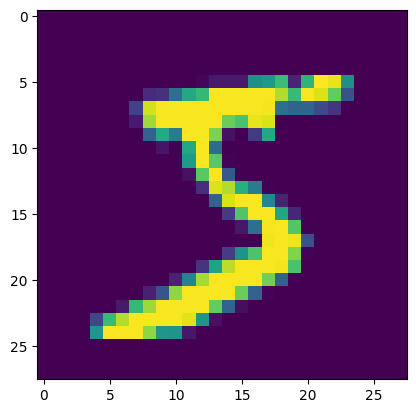

In [25]:
plt.imshow(img.permute(1, 2, 0)) # permute() 交换维度， channel放在最后
plt.show()

In [26]:
img_batch = img.view(-1).unsqueeze(0)
out = linear_model(img_batch)
out

tensor([[-2.4063, -2.3352, -2.2549, -2.2777, -2.2990, -2.4117, -2.2904, -2.2160,
         -2.3747, -2.1863]], grad_fn=<LogSoftmaxBackward0>)

In [27]:
out.shape

torch.Size([1, 10])

In [28]:
index = out.max(dim=1)
index

torch.return_types.max(
values=tensor([-2.1863], grad_fn=<MaxBackward0>),
indices=tensor([9]))

## 训练

这时候输出的0-9个数字还没有与分类对应起来。需要损失函数来介入。

In [29]:
learning_rate = 1e-4
# 这里选择了SGD作为优化器, optimizer 传入的变量会auto_grad
optimizer = optim.SGD(linear_model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss() # https://blog.csdn.net/qq_22210253/article/details/85229988

批量化

In [30]:
train_loader = torch.utils.data.DataLoader(transformed_mnist_train, batch_size=16,
                                           shuffle=True)

## tensorboard

In [31]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('./log/')

In [32]:
writer.add_graph(linear_model, img_batch)

In [33]:
def training_loop(epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, epochs + 1):
        for imgs, labels in train_loader:
            imgs = imgs.view(imgs.shape[0], -1).to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            
            # 这部分需要懂PyTorch的自动求导机制
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # if epoch == 1 or epoch % 10 == 0:
        print(f"Epoch {epoch}, Training loss {loss}")
        writer.add_scalar('MNIST Linear Model Training Loss', loss, epoch)

In [34]:
epochs = 2

In [35]:
training_loop(epochs, optimizer, linear_model.to(device=device), loss_fn, train_loader)

Epoch 1, Training loss 2.225822925567627
Epoch 2, Training loss 2.05379319190979


In [36]:
writer.add_image("test", imgs[0], 1)

## 验证

In [37]:
val_loader = torch.utils.data.DataLoader(mnist_val, batch_size=16,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        imgs = imgs.view(batch_size, -1).to(device=device)
        labels = labels.to(device=device)
        outputs = linear_model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        writer.add_scalar('MNIST Linear Model Training Accuracy', correct, total)
print("Accuracy: ", correct / total)

Accuracy:  0.5072


## CNN

In [38]:
from torchvision import models

In [39]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [40]:
resnet101 = models.resnet101(pretrained=True)

/Users/lucas/anaconda3/envs/pytorch_gpu/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/lucas/anaconda3/envs/pytorch_gpu/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [41]:
resnet101.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [57]:
import torch.nn as nn

In [58]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(
            in_channels=1,
            out_channels=16,    
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.act1 = nn.Tanh()
        # stride 默认值 是kernel_size
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(
            in_channels=16,
            out_channels=8,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(7 * 7 * 8, 10) # 28 / 2 / 2 = 7
        self.act3 = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        # 这是为什么需要自定义类的原因
        x = x.view(x.shape[0], -1)

        x = self.fc1(x)
        x = self.act3(x)
        return x

In [59]:
train_loader = torch.utils.data.DataLoader(transformed_mnist_train, batch_size=16,
                                           shuffle=True)

In [60]:
train_loader

In [61]:
train_loader.batch_size

16

In [66]:
def training_loop(epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, epochs + 1):
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.unsqueeze(1).to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            
            # 这部分需要懂PyTorch的自动求导机制
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # if epoch == 1 or epoch % 10 == 0:
        print(f"Epoch {epoch}, Training loss {loss}")
        writer.add_scalar('MNIST Linear Model Training Loss', loss, epoch)

In [67]:
learning_rate = 1e-4
# 这里选择了SGD作为优化器, optimizer 传入的变量会auto_grad
optimizer = optim.Adam(linear_model.parameters(), lr=learning_rate)
loss_fn = nn.L1Loss() # https://blog.csdn.net/qq_22210253/article/details/85229988

In [68]:
cnn = CNN()

In [69]:
training_loop(epochs, optimizer, cnn.to(device=device), loss_fn, train_loader)

/Users/lucas/anaconda3/envs/pytorch_gpu/lib/python3.9/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([16, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/Users/lucas/anaconda3/envs/pytorch_gpu/lib/python3.9/site-packages/torch/autograd/__init__.py:197: UserWarning: The operator 'aten::sgn.out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1670525849783/work/aten/src/ATen/mps/MPSFallback.mm:11.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 1, Training loss 4.900000095367432
Epoch 2, Training loss 4.349999904632568
